<a href="https://colab.research.google.com/github/jelly12paw/o_o/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # 의사결정나무(분류)
from sklearn.tree import DecisionTreeRegressor # 의사결정나무(회귀)
from sklearn.linear_model import LinearRegression # 단순 선형 회귀
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트(회귀)
from sklearn.model_selection import train_test_split # 훈련/테스트 분류
from sklearn.metrics import accuracy_score # 모델 성능 측정
from sklearn.metrics import r2_score # 모델 성능 평가
from sklearn.metrics import mean_squared_error # 모델 성능 평가

In [2]:
df = pd.read_csv('http://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


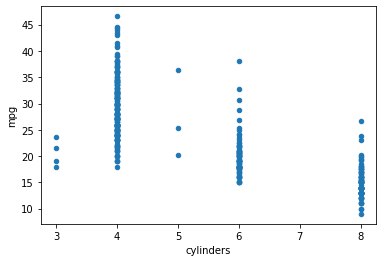

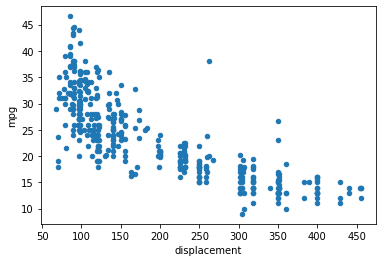

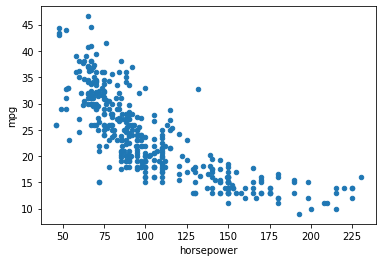

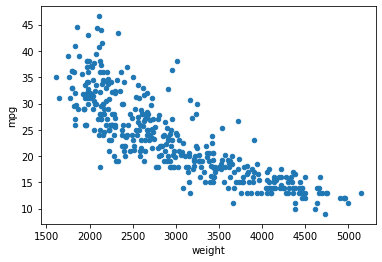

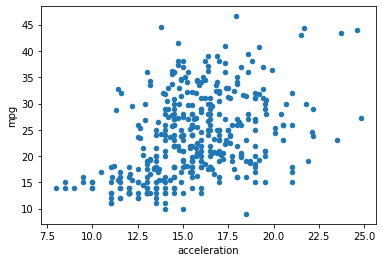

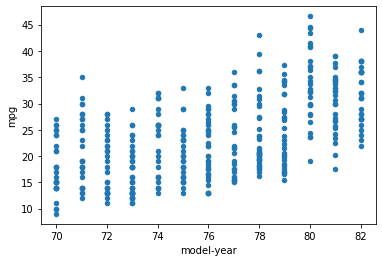

In [6]:
df.plot(kind = 'scatter', x = 'cylinders', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'displacement', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'horsepower', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'weight', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'acceleration', y = 'mpg')
plt.show()

df.plot(kind = 'scatter', x = 'model-year', y = 'mpg')
plt.show()

In [8]:
# 데이터 전처리 - 결측값 제거

df = df.dropna(axis = 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           396 non-null    float64
 1   cylinders     396 non-null    int64  
 2   displacement  396 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        396 non-null    int64  
 5   acceleration  396 non-null    float64
 6   model-year    396 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.8 KB


In [9]:
# 분석 데이터셋

x = df[['weight']]
y = df['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 1)
(80, 1)
(316,)
(80,)


**단순 선형회귀**

In [21]:
# 선형회귀

lr = LinearRegression()
lr.fit(x_train, y_train)

print('기울기 :', lr.coef_)
print('y절편 :', lr.intercept_)

pred = lr.predict(x_test)

r2 = r2_score(y_test, pred)
print('r2_score :', r2)


기울기 : [-0.00774371]
y절편 : 46.62501834798047
r2_score : 0.7015633872576372


In [22]:
# 피어슨 상관계수
# 0.7 이상 : 강한 양의 상관관계
# -0.7 이상 : 강한 음의 상관관계

corr = df.corr(method = 'pearson')
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
mpg,1.000000,-0.775680,-0.804711,-0.777575,-0.832725,0.421159,0.581144
cylinders,-0.775680,1.000000,0.950706,0.843751,0.896058,-0.504844,-0.352554
displacement,-0.804711,0.950706,1.000000,0.897787,0.932729,-0.542713,-0.374620
horsepower,-0.777575,0.843751,0.897787,1.000000,0.864350,-0.687241,-0.420697
weight,-0.832725,0.896058,0.932729,0.864350,1.000000,-0.415462,-0.311774
acceleration,0.421159,-0.504844,-0.542713,-0.687241,-0.415462,1.000000,0.294588
model-year,0.581144,-0.352554,-0.374620,-0.420697,-0.311774,0.294588,1.000000


In [27]:
df = pd.read_csv('http://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
# 데이터 전처리 - 결측치 제거

df = df.dropna(axis = 0)

df = df.drop('ocean_proximity', axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [31]:
# 피어슨 상관계수

corr = df.corr(method = 'pearson')

corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [32]:
# 분석 데이터셋

x = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


**다중 선형회귀**

In [33]:
# 다중 선형 회귀 분석

lr = LinearRegression()
lr.fit(x_train, y_train)

pred = lr.predict(x_test)

r2 = r2_score(y_test, pred)

print(r2)

0.644513029108233


**의사결정나무(회귀)**

In [36]:
# 의사결정나무 (회귀) : DecisionTreeRegressor(max_depth = 3, random_state = 42)

dtr = DecisionTreeRegressor(max_depth = 3, random_state = 42)
dtr.fit(x_train, y_train)

pred = dtr.predict(x_test)

mse = mean_squared_error(y_test, pred)

print(mse)

6793101269.876856


**랜덤포레스트(회귀)**

In [40]:
# 랜덤포레스트(회귀) : RandonForestRegressor(max_depth = 3, random_state = 42)

rft = RandomForestRegressor(max_depth = 3, random_state = 42)
rft.fit(x_train, y_train)

pred = rft.predict(x_test)

mse = mean_squared_error(y_test, pred)

mse

6447828605.376922

**비지도학습**

In [56]:
from sklearn.cluster import KMeans # K-means
from sklearn.preprocessing import LabelEncoder # 레이블 인코더

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from mlxtend.frequent_patterns import apriori, association_rules # 연관분석

from google.colab import drive

In [42]:
df = pd.read_csv('http://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [46]:
# 데이터 전처리 - 붓꽃 종을 숫자로 변경

df['species'] = LabelEncoder().fit_transform(df['species'])

df.groupby('species').size()

species
0    50
1    50
2    50
dtype: int64

In [47]:
df_copy = df

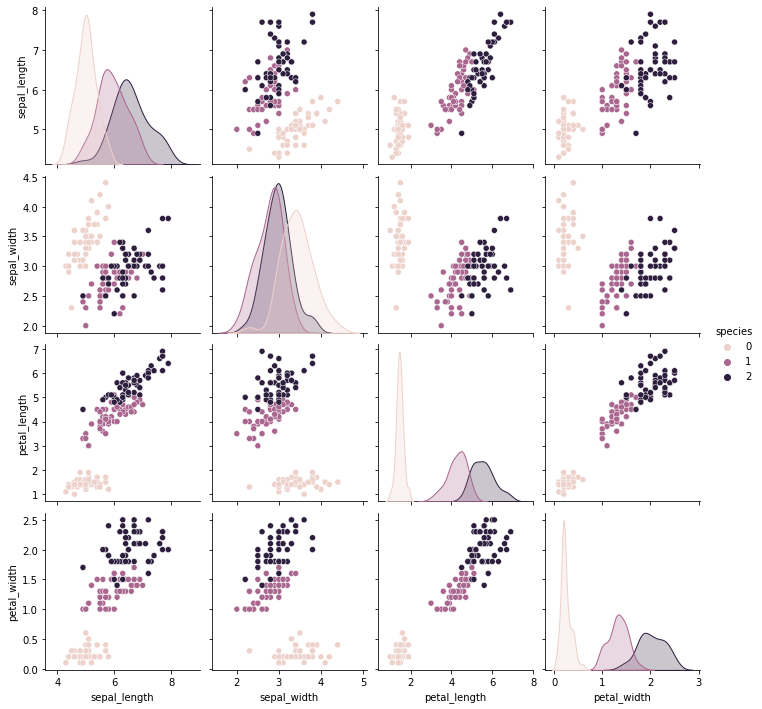

In [49]:
# 변수 간 상관관계 시각화

sns.pairplot(df, hue = 'species')
plt.show()

**K-means 군집분석**

In [51]:
# 데이터분석 수행 - K-means : KMeans(n_cluster = 3, n_init = 10, max_iter = 500, random_state = 42, algorithm = 'auto')

k1 = KMeans(n_clusters = 3, n_init = 10, max_iter = 500, random_state = 42, algorithm = 'auto')

k1.fit(df)
KMeans(max_iter=500, n_clusters=3, random_state=42)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [52]:
cc = k1.cluster_centers_
cp = k1.predict(df)

print(pd.DataFrame(cc))
print(cp)

          0         1         2         3         4
0  6.622449  2.983673  5.573469  2.032653  2.000000
1  5.006000  3.428000  1.462000  0.246000  0.000000
2  5.915686  2.764706  4.264706  1.333333  1.019608
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [53]:
df_copy['cluster'] = cp

df_copy

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


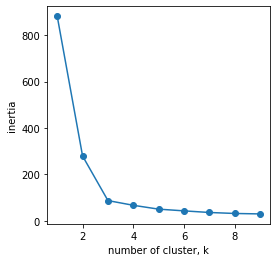

In [54]:
#  성능평가 및 시각화

scope = range(1, 10)
inertias = []

for k in scope :
  model = KMeans(n_clusters=k)
  model.fit(df)
  inertias.append(model.inertia_)

# K 개수와 inertia 비교 시각화
plt.figure(figsize=(4, 4))

plt.plot(scope, inertias, '-o')
plt.xlabel('number of cluster, k')
plt.ylabel('inertia')
plt.show()

**연관분석(장바구니 알고리즘)**

In [59]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/retail_dataset.csv', sep = ',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [63]:
# 데이터 전처리 - 원 핫 인코딩

items = set()
for col in df :
  items.update(df[col].unique())

itemset = set(items)
encoding = []
for index, row in df.iterrows() :
  rowset = set(row)
  labels = {}
  dis = list(itemset - rowset)
  mat = list(itemset.intersection(rowset))
  for i in dis :
    labels[i] = 0
  for j in mat :
    labels[j] = 1
  encoding.append(labels)

encoding[0]

result = pd.DataFrame(encoding)
result

,NaN,Bagel,Milk,Meat,Wine,Bread,Cheese,Pencil,Eggs,Diaper
0,0,0,0,1,1,1,1,1,1,1
1,0,0,1,1,1,1,1,1,0,1
2,1,0,1,1,1,0,1,0,1,0
3,1,0,1,1,1,0,1,0,1,0
4,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
310,1,0,0,0,0,1,1,0,1,0
311,1,0,1,1,0,0,0,1,0,0
312,0,0,0,1,1,1,1,1,1,1
313,1,0,0,1,0,0,1,0,0,0


In [64]:
# 데이터 전처리 - 결측치 제거

result = result.drop(result.columns[0], axis = 1)
result

,Bagel,Milk,Meat,Wine,Bread,Cheese,Pencil,Eggs,Diaper
0,0,0,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,0,1
2,0,1,1,1,0,1,0,1,0
3,0,1,1,1,0,1,0,1,0
4,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,1,1,0,1,0
311,0,1,1,0,0,0,1,0,0
312,0,0,1,1,1,1,1,1,1
313,0,0,1,0,0,1,0,0,0


In [65]:
# 데이터분석 - 연관분석 : apriori()

f_item = apriori(result, min_support=0.2, use_colnames=True)

f_item

,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.476190,(Meat)
3,0.438095,(Wine)
4,0.504762,(Bread)
5,0.501587,(Cheese)
6,0.361905,(Pencil)
7,0.438095,(Eggs)
8,0.406349,(Diaper)
9,0.225397,"(Bagel, Milk)"


In [66]:
# 연관분석 규칙 도출 - association_rules()

ru = association_rules(f_item, metric = 'confidence', min_threshold = 0.6)
ru

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
3,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
4,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
5,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
6,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
7,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
8,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
9,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845
